In [2]:
import pandas as pd

train_data = pd.read_csv(f'C:/Users/smolt/PycharmProjects/titanic_test/data_files/train.csv')
test_data = pd.read_csv(f'C:/Users/smolt/PycharmProjects/titanic_test/data_files/test.csv')

In [3]:
# Виведення перших кількох рядків для огляду даних
print(train_data.head())

# Описова статистика
print(train_data.describe())

# Перевірка на пропущені значення
print(train_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
# Виведення перших кількох рядків для огляду даних
print(test_data.head())

# Описова статистика
print(test_data.describe())

# Перевірка на пропущені значення
print(test_data.isnull().sum())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000 

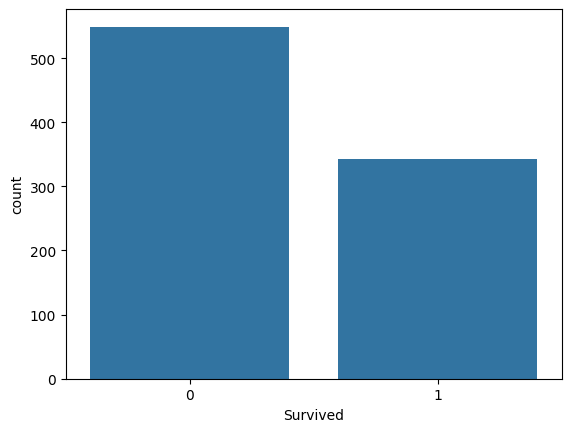

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Розподіл виживших та невиживших
sns.countplot(x='Survived', data=train_data)
plt.show()

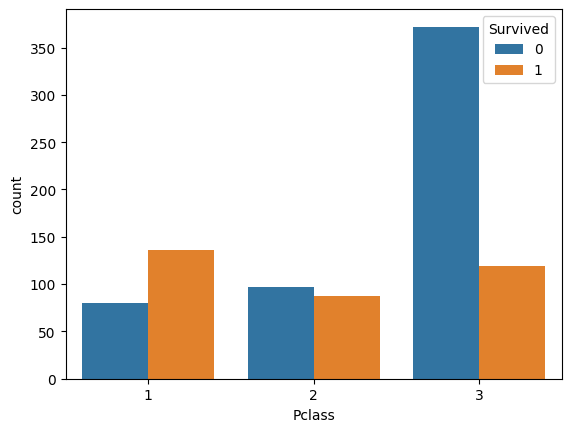

In [6]:
# Розподіл виживших за класом
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.show()

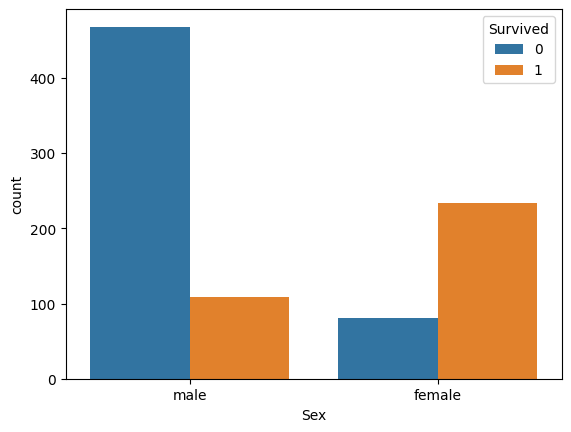

In [7]:
# Розподіл виживших за статтю
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

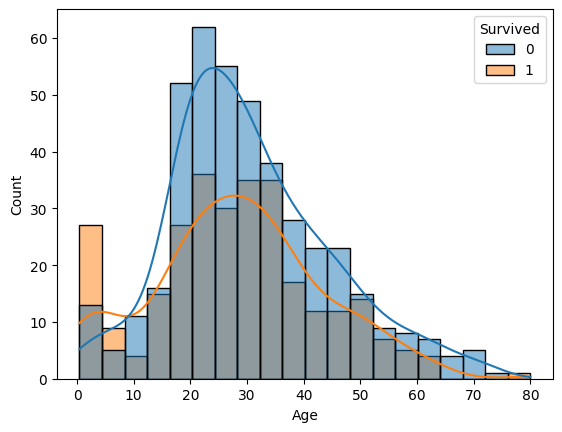

In [8]:
# Розподіл виживших за віком
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.show()

In [9]:
# Обробка пропущених значень
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [10]:
# Кодування категоріальних змінних
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
# Видалення непотрібних змінних
test_passenger_ids = test_data['PassengerId']
train_data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

# Розділення навчального набору на train та validation
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('Survived', axis=1), train_data['Survived'], test_size=0.2, random_state=42)

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



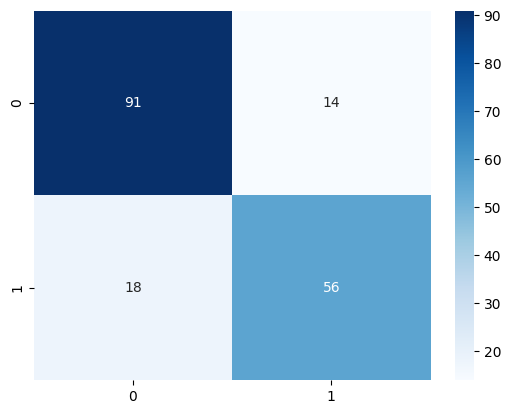

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Передбачення на валідаційному наборі
y_pred = model.predict(X_val)

# Оцінка моделі
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.show()

In [14]:
# Передбачення на тестовому наборі
test_predictions = model.predict(test_data)

In [15]:
submission = pd.DataFrame({'PassengerId': test_passenger_ids, 'Survived': test_predictions})
submission.to_csv('titanic_submission.csv', index=False)

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\smolt\PycharmProjects\titanic_test\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


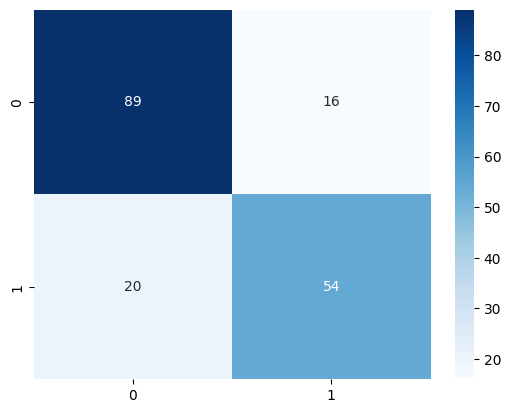

In [18]:
from sklearn.linear_model import LogisticRegression

# Створення та навчання моделі
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Передбачення на валідаційному наборі
y_pred = logreg_model.predict(X_val)

# Оцінка моделі
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Створення та навчання моделі дерева рішень
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Передбачення на валідаційному наборі
y_pred_tree = tree_model.predict(X_val)

# Оцінка моделі дерева рішень
print("Accuracy (Decision Tree):", accuracy_score(y_val, y_pred_tree))
print("\nClassification Report (Decision Tree):\n", classification_report(y_val, y_pred_tree))

Accuracy (Decision Tree): 0.7821229050279329

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

